## Proyecto Prediccion de atraso de vuelos ##

In [ ]:
# 1. Importacion de Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay UniqueCarrier  flight tailnum origin dest  \
0             819       11.0            UA    1545  N14228    EWR  IAH   
1             830       20.0            UA    1714  N24211    LGA  IAH   
2             850       33.0            AA    1141  N619AA    JFK  MIA   
3            1022      -18.0            B6     725  N804JB    JFK  BQN   
4             837      -25.0            DL     461  N668DN    LGA  ATL   

   air_time  distance  hour  minute         time_hour  
0     227.0      1400     5      15  01-01-2013 05:00  
1     227.0      1416 

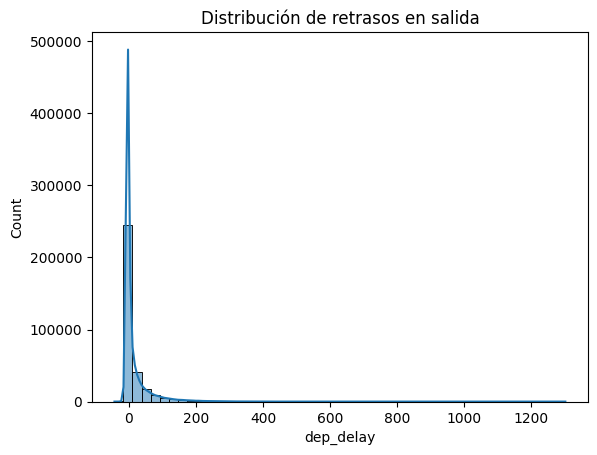

In [8]:
# 2. Carga y exploracion inicial de datos
df = pd.read_csv("flight_data.csv")

# Vista rápida
print(df.head())
print(df.info())
print(df.describe())

# Ver valores nulos
print(df.isnull().sum())

# Distribución de retrasos
sns.histplot(df['dep_delay'], bins=50, kde=True)
plt.title("Distribución de retrasos en salida")
plt.show()

In [9]:
# 3. Limpieza de datos

# Variable objetivo: retraso en llegada
df['delayed'] = np.where(df['arr_delay'] > 15, 1, 0)

# Eliminar columnas irrelevantes
df = df.drop(['tailnum','time_hour'], axis=1)

# Rellenar nulos si existen
df = df.dropna()

In [10]:
# 4. Creacion de variables relevantes
# Convertir fecha a día de la semana
df['date'] = pd.to_datetime(df[['year','month','day']])
df['day_of_week'] = df['date'].dt.day_name()

# Codificación de variables categóricas
categorical_cols = ['UniqueCarrier','origin','dest','day_of_week']
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [11]:
# 5. Division de train y test

X = df.drop(['delayed','date'], axis=1)
y = df['delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [12]:
# 6. Entrenamiento de modelos

# Regresion Logistica
logreg = LogisticRegression(max_iter=50000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=50000, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

KeyboardInterrupt: 

--- Logistic Regression ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


--- Random Forest ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0




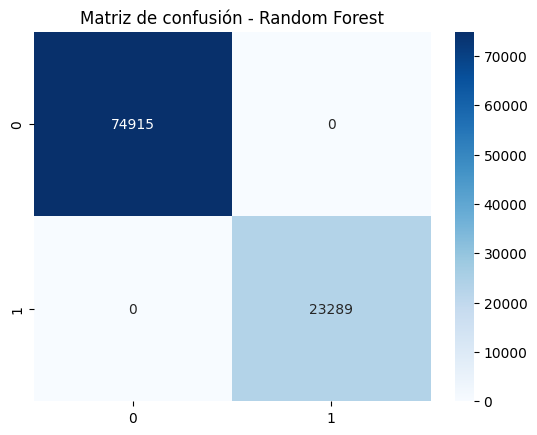

In [7]:
# 7. Evaluacion de desempeño

def evaluar_modelo(y_true, y_pred, nombre):
    print(f"--- {nombre} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("\n")

evaluar_modelo(y_test, y_pred_log, "Logistic Regression")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión - Random Forest")
plt.show()

In [ ]:
# 8. Exportacion del modelo

# Guardar modelo Random Forest
joblib.dump(rf, "modelo_rf.pkl")

# Guardar modelo Logistic Regression
joblib.dump(logreg, "modelo_logreg.pkl")